In [1]:
from __future__ import division
import sys
import random
import copy
import math
import json

import numpy as np
import pandas as pd
import scipy


%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

sys.path.append("../resources/")
import sct_py3
sns.set_style("ticks")
sns.set_context("talk")

output_dir = "out/"
output_suffix = ""
output_formats = [".png", ".pdf"]


mpl.rc('savefig', dpi=300)

def save_figure(fig, name):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format)
    return None

mpl.rc('savefig', dpi=300)

pd.options.mode.chained_assignment = None  # default='warn'


/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_ORN_24h = pd.read_csv('../data/htseq_ORN_cell_LogCPM_10plates_hq50k_neuron2-5.tab.gz', sep="\t", header=0, index_col=0)

In [3]:
names_hq_ORNs = []
with open("../resources/Figure4/986_hq_24h_ORNs_Acj6pos.txt") as f:
    for line in f:
        names_hq_ORNs.append(line.rstrip())
print ("names_hq_ORNs"), len(names_hq_ORNs)

names_hq_ORNs


(None, 986)

In [4]:
df_libs = pd.read_csv('../data/PN_ORN_libs_CNM.csv', sep=",", header=0, index_col=0)
df_libs.head()


,pooled_library,SampleID,Index,num,experiment,plate,well,num_cells,num_mapped_reads,color,genotype,colorHL,label
library,,,,,,,,,,,,,
N447Barcode_701-502,N477,1000100701-A1-flybrain-1,TAAGGCGA-ATAGAGAG,2477.0,13.0,1000100701,A1,1.0,NaN,#a3eb13,nSyb_48h_ORN,#e31a1c,nSyb_48h_ORN_P0
N447Barcode_702-502,N447,1000100701-A2-flybrain-1,CGTACTAG-ATAGAGAG,2478.0,13.0,1000100701,A2,1.0,NaN,#a3eb13,nSyb_48h_ORN,#e31a1c,nSyb_48h_ORN_P0
N447Barcode_703-502,N447,1000100701-A3-flybrain-1,AGGCAGAA-ATAGAGAG,2479.0,13.0,1000100701,A3,1.0,NaN,#a3eb13,nSyb_48h_ORN,#e31a1c,nSyb_48h_ORN_P0
N447Barcode_704-502,N447,1000100701-A4-flybrain-1,TCCTGAGC-ATAGAGAG,2480.0,13.0,1000100701,A4,1.0,NaN,#a3eb13,nSyb_48h_ORN,#e31a1c,nSyb_48h_ORN_P0
N447Barcode_705-502,N447,1000100701-A5-flybrain-1,GGACTCCT-ATAGAGAG,2481.0,13.0,1000100701,A5,1.0,NaN,#a3eb13,nSyb_48h_ORN,#e31a1c,nSyb_48h_ORN_P0


In [5]:
df = df_ORN_24h[list(names_hq_ORNs)]
df.shape

(17472, 986)

In [6]:
receptors_24h = []
with open('../data/Figure3/24h_receptors>=3>5cells.txt') as f:
    for line in f: 
        receptors_24h.append(line.rstrip())
len(receptors_24h)

16

In [7]:
X = df

In [8]:
receptors_24h

['Orco',
 'Or42b',
 'Or43b',
 'Or85f',
 'Or9a',
 'Ir25a',
 'Ir41a',
 'Ir68a',
 'Ir75d',
 'Ir76a',
 'Ir93a',
 'Gr10b',
 'Gr21a',
 'Gr61a',
 'Gr64a',
 'Gr93a']

In [9]:
#remove co-receptors from 24h receptor list
receptors_24h.remove('Orco')
receptors_24h.remove('Ir25a')


In [10]:
receptors_24h

['Or42b',
 'Or43b',
 'Or85f',
 'Or9a',
 'Ir41a',
 'Ir68a',
 'Ir75d',
 'Ir76a',
 'Ir93a',
 'Gr10b',
 'Gr21a',
 'Gr61a',
 'Gr64a',
 'Gr93a']

In [11]:
genes = ['Or42b', 'Gr21a',  'Gr93a','Gr10b','Or85f','Ir76a','Gr61a','Gr64a','Or9a','Ir68a','Ir41a','Or43b', 'Ir93a','Ir75d',
          ]

Z = X.loc[genes]
print (Z.shape)

(14, 986)


[]

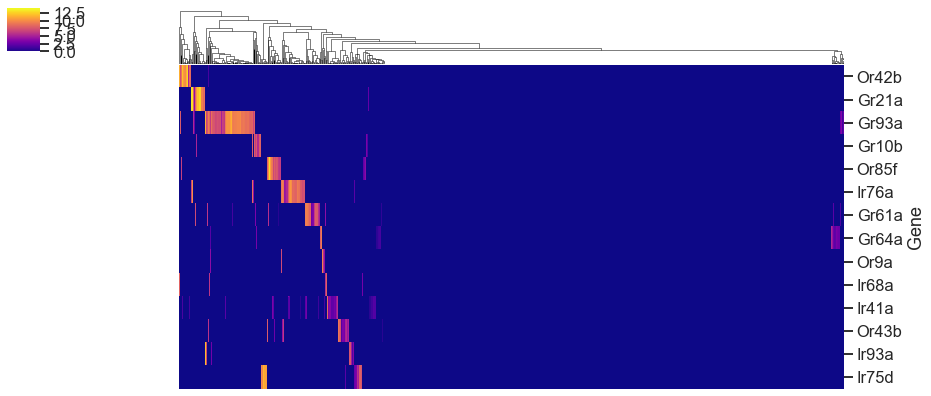

In [12]:
# Calculate clustering and plot
cm = sns.clustermap(Z, method="weighted", cmap="plasma", figsize=(15,7),row_cluster=False, col_cluster=True) 
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cm.ax_heatmap.set_ylabel("Gene", )
cm.ax_heatmap.set_xticks([])
cm.ax_heatmap.set_xticklabels([])